# DECISION TREE
## Regression

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
# Question 1
from sklearn.datasets import load_breast_cancer
# Question 2
from sklearn.model_selection import train_test_split
# Question 4
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
#import graphviz

#plt.rcParams['figure.dpi'] = 300

### 1. Exploration et préparation données

In [57]:
df = pd.read_csv('../scrap_anouar/dataAuto.csv', sep = ',')
df.head(5)

Marque  \
0  OPEL INSIGNIA 2 SPORTS TOURER   
1            VOLKSWAGEN TOURAN 2   
2                        AUDI Q3   
3                     OPEL MOKKA   
4                   HONDA CR-V 4   

                                            Model  Année  Code Postal  \
0    II SPORTS TOURER 1.6 ECOTEC DIESEL 136 ELITE   2017           31   
1  II 1.6 TDI 105 FAP BLUEMOTION TECHNOLOGY CARAT   2011           55   
2                        (2) 2.0 TDI 120 AMBIENTE   2016           24   
3         1.6 CDTI 136 4X2 ECOFLEX S/S COSMO PACK   2016           66   
4   IV (2) 1.6 I-DTEC 120 2WD EXECUTIVE NAVI PLUS   2018           69   

  Carburant Emission Co2 Transmission  nbPortes  nbPlace Kilométrage     Prix  
0    Diesel      110-130     Manuelle         5        5    119 000   13 900   
1    Diesel      110-130     Manuelle         5        5     72 330   13 490   
2    Diesel      110-130     Manuelle         5        5    114 100   17 990   
3    Diesel      110-130     Manuelle         5        5    121 019   10 990   
4    Diesel      110-130     Manuelle         5        5     88 653   21 300

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23062 entries, 0 to 23061
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Marque        23062 non-null  object
 1   Model         23062 non-null  object
 2   Année         23062 non-null  int64 
 3   Code Postal   23062 non-null  int64 
 4   Carburant     23062 non-null  object
 5   Emission Co2  23062 non-null  object
 6   Transmission  23062 non-null  object
 7   nbPortes      23062 non-null  int64 
 8   nbPlace       23062 non-null  int64 
 9   Kilométrage   23062 non-null  object
 10  Prix          23062 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


In [59]:
# Nettoyage de la marque
for brand in df['Marque']:
    old_brand = brand
    new_brand = brand.split()[0]
    df['Marque'] = df['Marque'].replace(to_replace=old_brand, value=new_brand)

In [60]:
# Supression de Model
df.drop(columns=['Model'], inplace=True)
df.head(5)

Marque  Année  Code Postal Carburant Emission Co2 Transmission  \
0        OPEL   2017           31    Diesel      110-130     Manuelle   
1  VOLKSWAGEN   2011           55    Diesel      110-130     Manuelle   
2        AUDI   2016           24    Diesel      110-130     Manuelle   
3        OPEL   2016           66    Diesel      110-130     Manuelle   
4       HONDA   2018           69    Diesel      110-130     Manuelle   

   nbPortes  nbPlace Kilométrage     Prix  
0         5        5    119 000   13 900   
1         5        5     72 330   13 490   
2         5        5    114 100   17 990   
3         5        5    121 019   10 990   
4         5        5     88 653   21 300

In [61]:
# Conversion Kilométrage
import unicodedata
for km in df['Kilométrage']:
    old_km = km
    new_km = int(unicodedata.normalize('NFKD', km).replace(" ", ""))
    df['Kilométrage'] = df['Kilométrage'].replace(to_replace=old_km, value=new_km)

In [64]:
df.head(5)

Marque  Année  Code Postal Carburant Emission Co2 Transmission  \
0        OPEL   2017           31    Diesel      110-130     Manuelle   
1  VOLKSWAGEN   2011           55    Diesel      110-130     Manuelle   
2        AUDI   2016           24    Diesel      110-130     Manuelle   
3        OPEL   2016           66    Diesel      110-130     Manuelle   
4       HONDA   2018           69    Diesel      110-130     Manuelle   

   nbPortes  nbPlace  Kilométrage     Prix  
0         5        5       119000  13 900   
1         5        5        72330  13 490   
2         5        5       114100  17 990   
3         5        5       121019  10 990   
4         5        5        88653  21 300

In [65]:
# Conversion Prix
for km in df['Prix']:
    old = km
    new = int(unicodedata.normalize('NFKD', km).replace(" ", ""))
    df['Prix'] = df['Prix'].replace(to_replace=old, value=new)

In [66]:
df.head(5)

Marque  Année  Code Postal Carburant Emission Co2 Transmission  \
0        OPEL   2017           31    Diesel      110-130     Manuelle   
1  VOLKSWAGEN   2011           55    Diesel      110-130     Manuelle   
2        AUDI   2016           24    Diesel      110-130     Manuelle   
3        OPEL   2016           66    Diesel      110-130     Manuelle   
4       HONDA   2018           69    Diesel      110-130     Manuelle   

   nbPortes  nbPlace  Kilométrage   Prix  
0         5        5       119000  13900  
1         5        5        72330  13490  
2         5        5       114100  17990  
3         5        5       121019  10990  
4         5        5        88653  21300

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23062 entries, 0 to 23061
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Marque        23062 non-null  object
 1   Année         23062 non-null  int64 
 2   Code Postal   23062 non-null  int64 
 3   Carburant     23062 non-null  object
 4   Emission Co2  23062 non-null  object
 5   Transmission  23062 non-null  object
 6   nbPortes      23062 non-null  int64 
 7   nbPlace       23062 non-null  int64 
 8   Kilométrage   23062 non-null  int64 
 9   Prix          23062 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.8+ MB


In [63]:
# charge le jeu de données
data = pd.read_csv('dataAuto_clean.csv', sep = ';')
# affecte les features à X
X = data.data
# affecte la target à y
y = data.target
# affiche la description du jeu de données
print(data.DESCR)

FileNotFoundError: [Errno 2] No such file or directory: 'dataAuto_clean.csv'

#### Données d'entraînement et de test
**Question 2** :<br>
Diviser le jeu de données en jeu de données d'entraînement (70%) et de test (30%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Question 3** :<br>
Comment le paramètre *random_state* influence le split du dataset ? <br>
**Ressources** 
<a href="https://www.bitdegree.org/learn/train-test-split">Splitting Datasets With the Sklearn train_test_split Function</a>

Les paramètres de la fonction train_test_split() :
    
- X, y : sont les entrées/sorties du jeu de données.

- train_size : détermine la part du jeu dédiée à l'entrainement (3 options : 'None' par defaut, un entier pour le nombre exact d'échantillons et un float compris entre 0.1 et 1.0).

- test_size : spécifie la part du jeu de données réservée au test, est egal à la différence avec la taille du jeu d'entrainement ou de 0.25 par defaut.

- random_state : effectue par defaut un split aléatoire en utilisant np.random. Peut être utiliser avec un nombre déterminé et permet ainsi de conserver la même répartition du jeu.

#### Modèle | DecisionTreeClassifier
**Question 4** :<br>
Créer l'objet *classifier* de la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">*DecisionTreeClassifier*</a> du package *sklearn.tree*. <br>
Utiliser les paramètres par défaut.

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

#### Entraînement du l'arbre de décision

**Question 5** : <br>Utiliser la méthode *fit* de la classe *DecisionTreeClassifier* pour entraîner le modèle d'arbre de classification *classifier* en utilisant les données d'entraînement *X_train* et *y_train* (algorithme supervisé)

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

#### Prédiction
**Question 6** : <br>
Prédire si un patient a une tumeur maligne ou bénine en utilisant le modèle entraîné précédemment et la méthode *predict* de la classe *DecisionTreeClassifier* avec comme paramètre les données de test *y_test*.<br>
Stocker le résultat de la prédiction dans la variable y_pred

In [ ]:
y_pred = classifier.predict(X_test)

#### Visualisation de l'arbre de décision
Il existe plusieurs manière pour visualiser l'arbre de décision pour une meilleure lisibilité et interprétation du modèle. <br>
Ressource : <a href="https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc">*Visualizing DEcision Trees with Python (Scikit-lean, Graphiz, Matplotlib*</a>

**Question 7** : <br>
Visualiser le modèle *classifier* en utilisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree">*plot_tree*</a> du package *skleran.tree*

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(classifier, filled=True, max_depth=3)

[Text(2688.28125, 4077.0, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(1889.0625, 3171.0, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(1162.5, 2265.0, 'X[13] <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(581.25, 1359.0, 'X[27] <= 0.136\ngini = 0.034\nsamples = 232\nvalue = [4, 228]'),
 Text(290.625, 453.0, '\n  (...)  \n'),
 Text(871.875, 453.0, '\n  (...)  \n'),
 Text(1743.75, 1359.0, 'X[1] <= 23.86\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(1453.125, 453.0, '\n  (...)  \n'),
 Text(2034.375, 453.0, '\n  (...)  \n'),
 Text(2615.625, 2265.0, 'X[8] <= 0.152\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(2325.0, 1359.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(2906.25, 1359.0, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(3487.5, 3171.0, 'X[13] <= 13.93\ngini = 0.098\nsamples = 135\nvalue = [128, 7]'),
 Text(3196.875, 2265.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(3778.1

**Question 8** : <br>
Visualiser le modèle classifier en utilisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz">*Graphiz*</a> <br>
Installer le package <a href="https://anaconda.org/conda-forge/python-graphviz">*Graphiz*</a> 

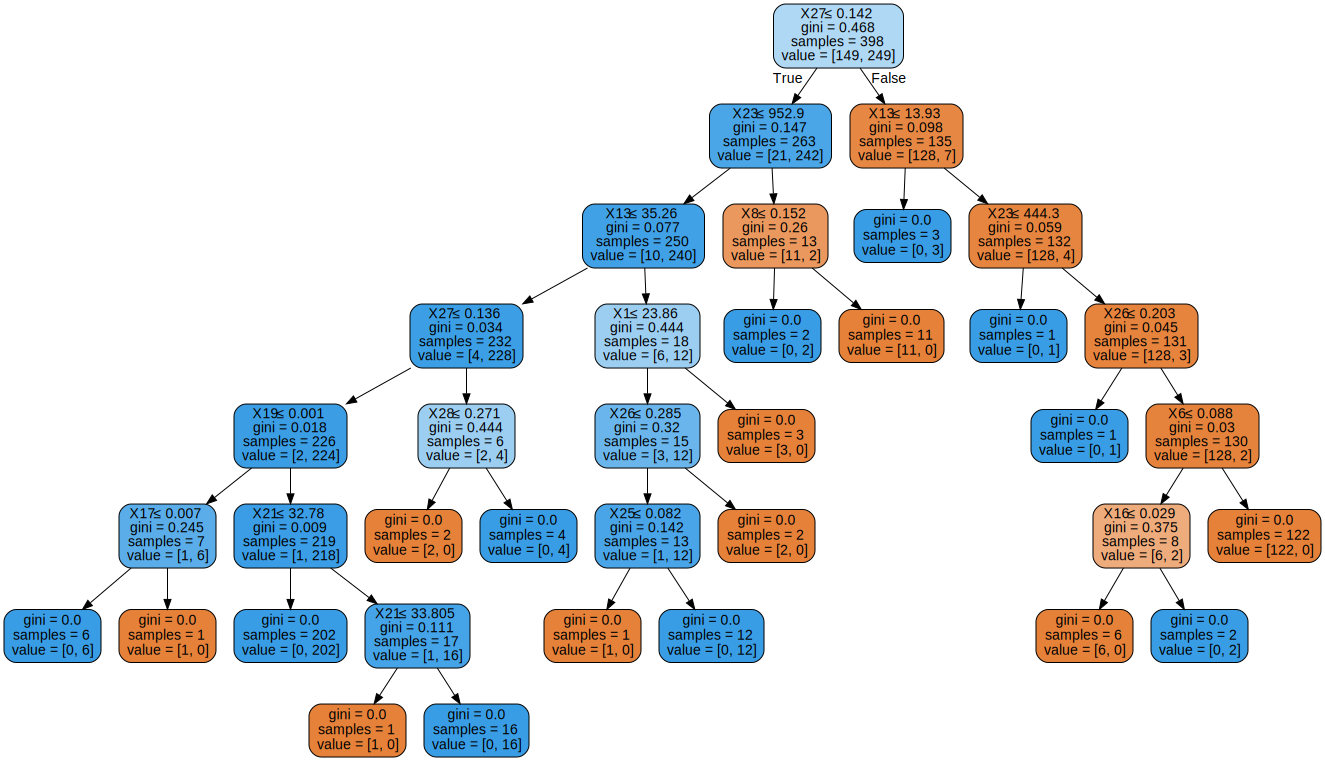

In [ ]:
dot_data = export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("img/breast_cancer_wisconsin")
dot_data = export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

**Question 9** :<br>
L'arbre généré est-il exploitable ? <br>
Conclure !

J'en conlu que l'abre généré n'est pas exploitable, trop de noeuds le rendent illisible, il a trop de profondeur.

#### Evaluation 
**Question 10** : <br>
Evaluer la qualité du modèle en utilisant la méthode *score* de la classe *DecisionTreeClassifier* pour les données d'entraînement et de test. 

In [ ]:
print('classifier score with training data :',classifier.score(X_train, y_train))
print('classifier score with testing data :', classifier.score(X_test, y_test))

classifier score with training data : 1.0
classifier score with testing data : 0.9122807017543859


#### Intérpretation  


**Question 11** :<br> 
A quoi correspond le critère d'évaluation utilisé pour le calcul du score ? 

**Question 12** :<br>
Comparez les deux scores et conclure !

Fin première partie <br>
--- 

### Algorithmes de construction des arbres de décision<a class="anchor" id="algos"></a>

**Question 14** : <br>
* Citer les différents algorithmes d'arbres de décision. 
* Quel est l'algorithme implémenté dans scikit learn ? 
**Ressource** : <br>
<a href="https://scikit-learn.org/stable/modules/tree.html#">Decision Trees - Scikit Learn</a>


* **ID3 Iterative Dichotomiser 3** <br>
 
* **C4.5** <br>

* **C5.0** <br>

* **CART Classification And Regression Trees** <br>




### Exemple <a class="anchor" id="exemple"></a> <br>
Pour mieux comprendre comment l'arbre de décision est construit, un exemple est détaillé <a href="https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision%20tree%20builds%20regression%20or,decision%20nodes%20and%20leaf%20nodes">ici</a>. <br>
L'exemple utilise l'algorithme ID3, qui est la base de CART utilisé par scikit learn. 

**Question 15**: <br>
En utilisant l'arbre de décision de l'exemple précédent, prédire le nombre d'heures jouées dans les conditions suivantes : [Outlook = Sunny,Temp = Mild ,Humidity = High, Windy = False] ?

heures jouées prédites = ... <br>
heures jouées réeels = ...

Fin deuxième partie <br>
---

### Application : prédire le type d'Iris <a class="anchor" id="boston"></a>

#### Jeu de données 
**Question 16** : <br>
Charger le jeu de données <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=boston#sklearn.datasets.load_iris">iris</a> de sklearn <br>
Tips : 
* Utiliser la fonction *load_boston()* du package *sklearn.datasets*. Le résultat est affecté à la variable *dataset*
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 
* Transformer le *dataset* à un DataFrame, *df*, en utilisant *pandas* et les attributs *data* et *feature_names* du dictionnaire *data*
* Créer une variable $X$ qui représente les variables explicatives. Pour cet exemple, on se limite aux variables 'RM', 'LSTAT' et 'PTRATIO'
* Créer une variable $y$ qui contient la variable expliquée (target)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve, RocCurveDisplay
import scikitplot as skplt
import matplotlib as plt

## Etape 1 : Load data

In [ ]:
# on charge le jeu de donnée
dataset = load_iris()
#print(dataset.DESCR)

# on affecte les features et les targets à des variables X y
X = dataset.data
y = dataset.target

## Etape 2 : Split dataset

In [ ]:
# on divise les X et y en 2 groupes : training 70% et test 30%
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X,y, test_size=0.3, random_state=10)

## Etape 3 : Train modele

In [ ]:
# on instancie un modèle de classification
clf_model = DecisionTreeClassifier()

# on execute la méthode d'entrainement du modele sur nos données de training
clf_model.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier()

## Etape 4 : Testing prediction

In [ ]:
# Notre modèle est entrainé
# on teste notre modèle avec les données de test
# on récupère nos prédictions
y_pred_iris = clf_model.predict(X_test_iris)


## Etape 5 : Visualisation

[Text(697.5, 815.4, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(590.1923076923077, 634.2, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(804.8076923076923, 634.2, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(429.2307692307692, 453.0, 'petal length (cm) <= 4.95\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(214.6153846153846, 271.80000000000007, 'petal width (cm) <= 1.6\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(107.3076923076923, 90.60000000000002, '\n  (...)  \n'),
 Text(321.9230769230769, 90.60000000000002, '\n  (...)  \n'),
 Text(643.8461538461538, 271.80000000000007, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(536.5384615384615, 90.60000000000002, '\n  (...)  \n'),
 Text(751.1538461538462, 90.60000000000002, '\n  (...)  \n'),
 Text(1180.3846153846155, 453.0, 'petal length (cm) <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),


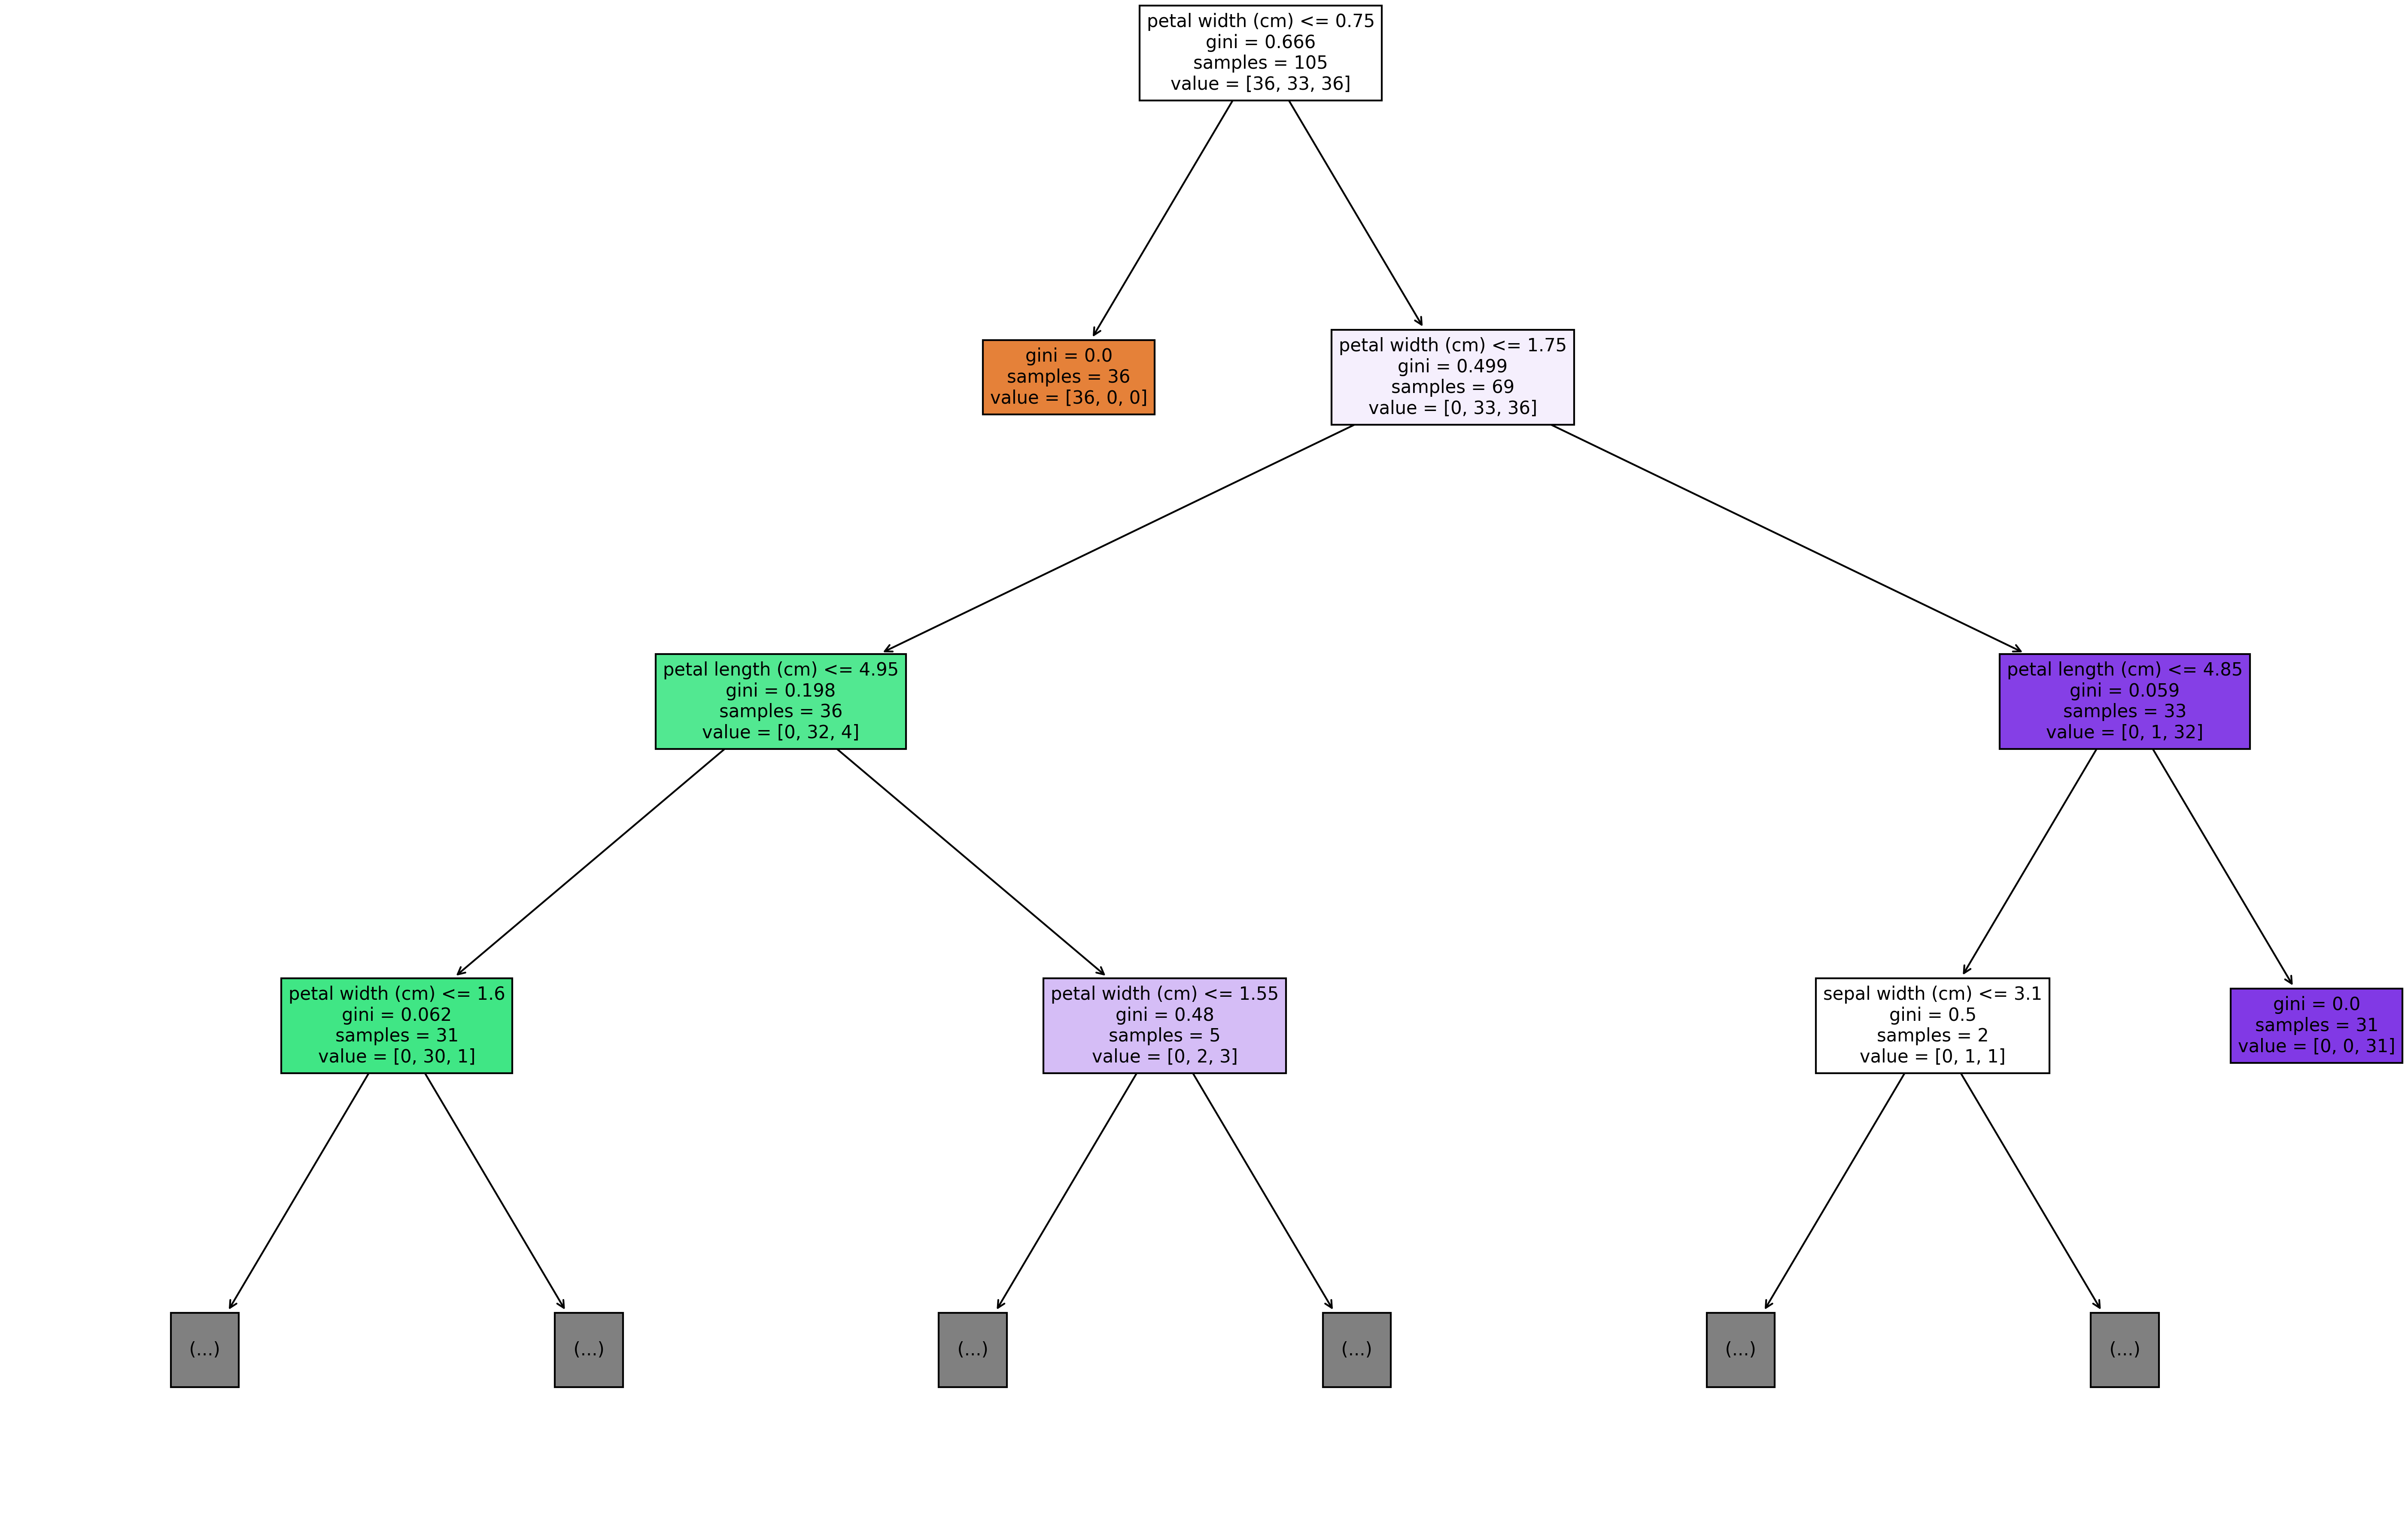

In [ ]:
# on visualise notre modèle avec plot tree
plot_tree(clf_model, max_depth=3, filled=True, fontsize=10, feature_names=dataset.feature_names)

## Etape 6 : Model evaluation

In [ ]:
# on calcul l'accuracy du modèle en comparant les y des données test aux y prédit 
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



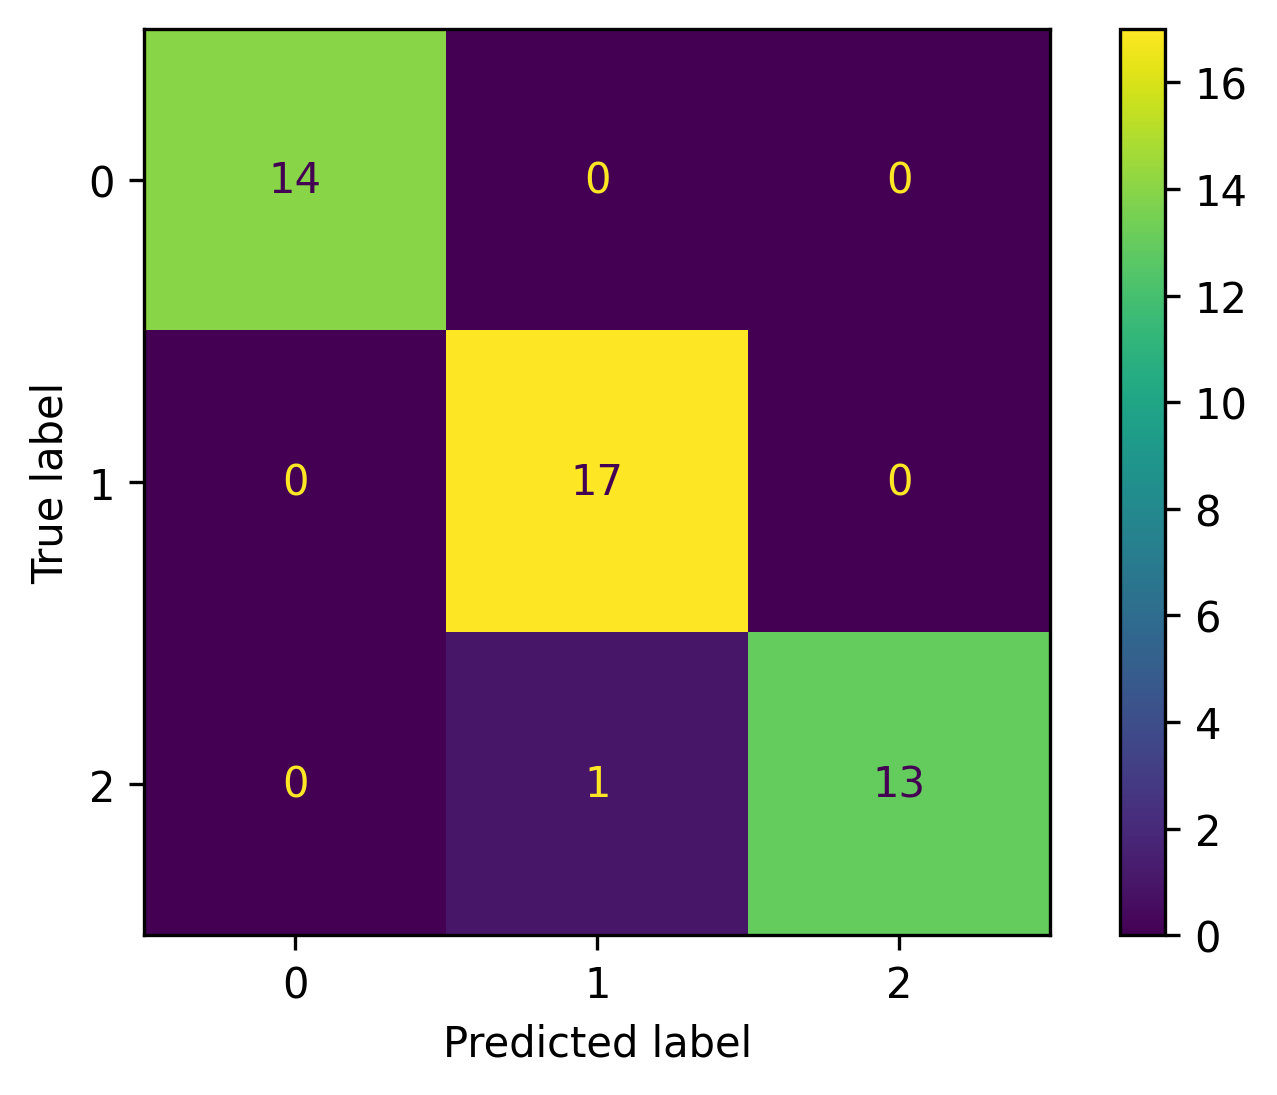

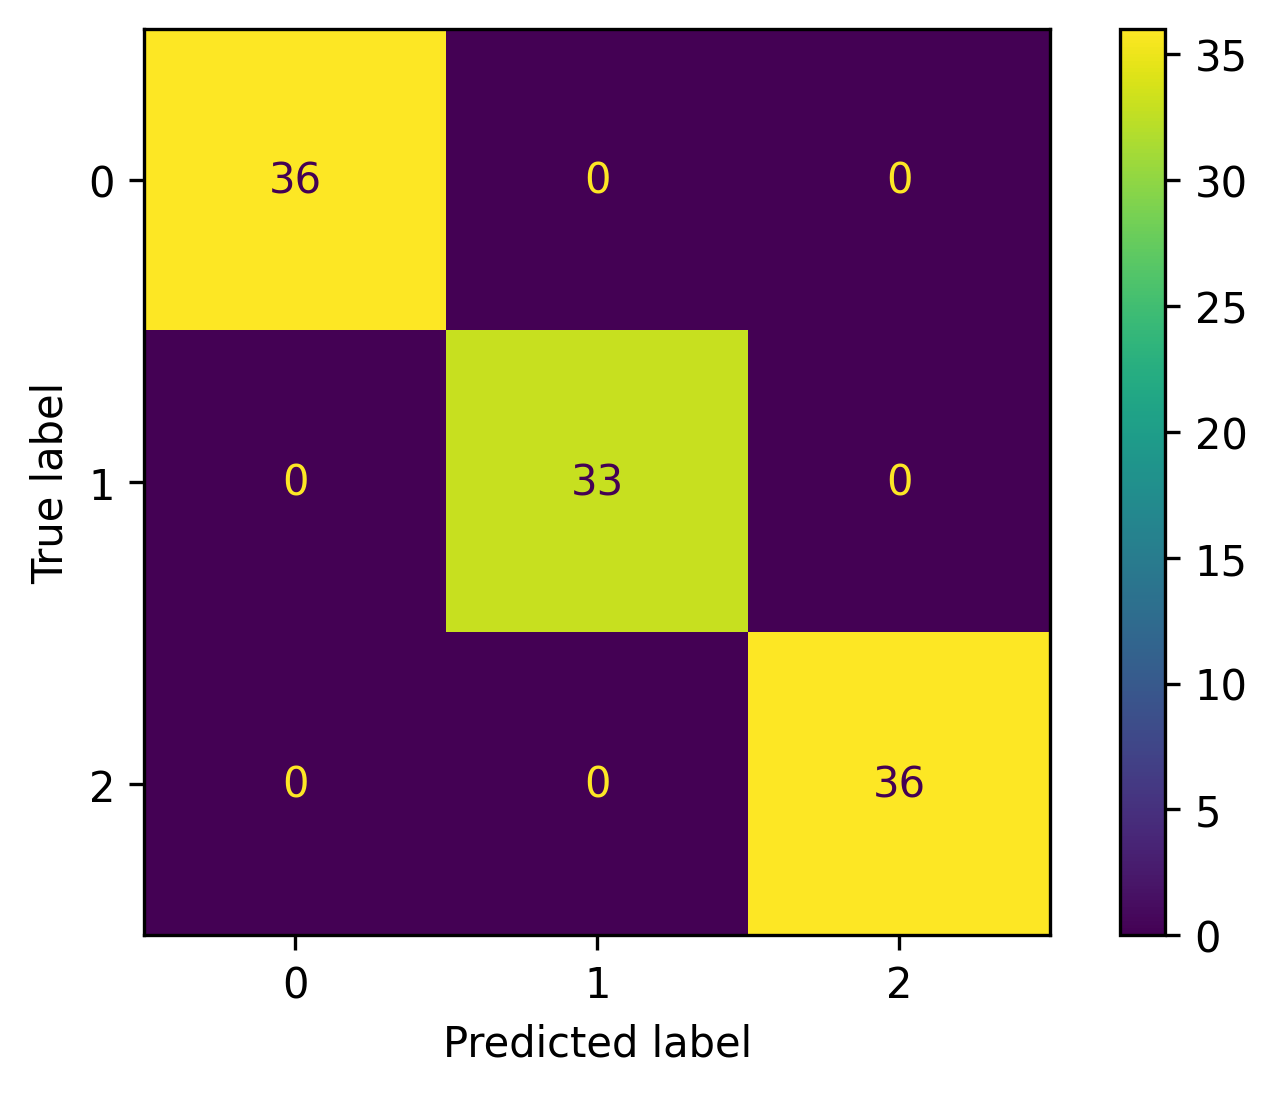

In [ ]:
# on visionne la matrice de confusion
#mtx = plot_confusion_matrix(clf_model, X_test_iris, y_test_iris) 
#mtx.figure_.suptitle("Confusion Matrix Iris dataset")
# function deprecated in 1.0 and removed in 1.2
mtx = ConfusionMatrixDisplay.from_predictions(y_test_iris, y_pred_iris)
mtx1 = ConfusionMatrixDisplay.from_estimator(clf_model,X_train_iris, y_train_iris)


In [ ]:
# on visualise la courbe roc
# plot_roc_curve(clf_model, X_test_iris, y_test_iris)
# function deprecated in 1.0 and removed in 1.2
# roc = RocCurveDisplay.from_estimator(clf_model, X_test_iris, y_test_iris)
#roc1 = RocCurveDisplay.from_estimator(clf_model,X_train_iris, y_train_iris)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

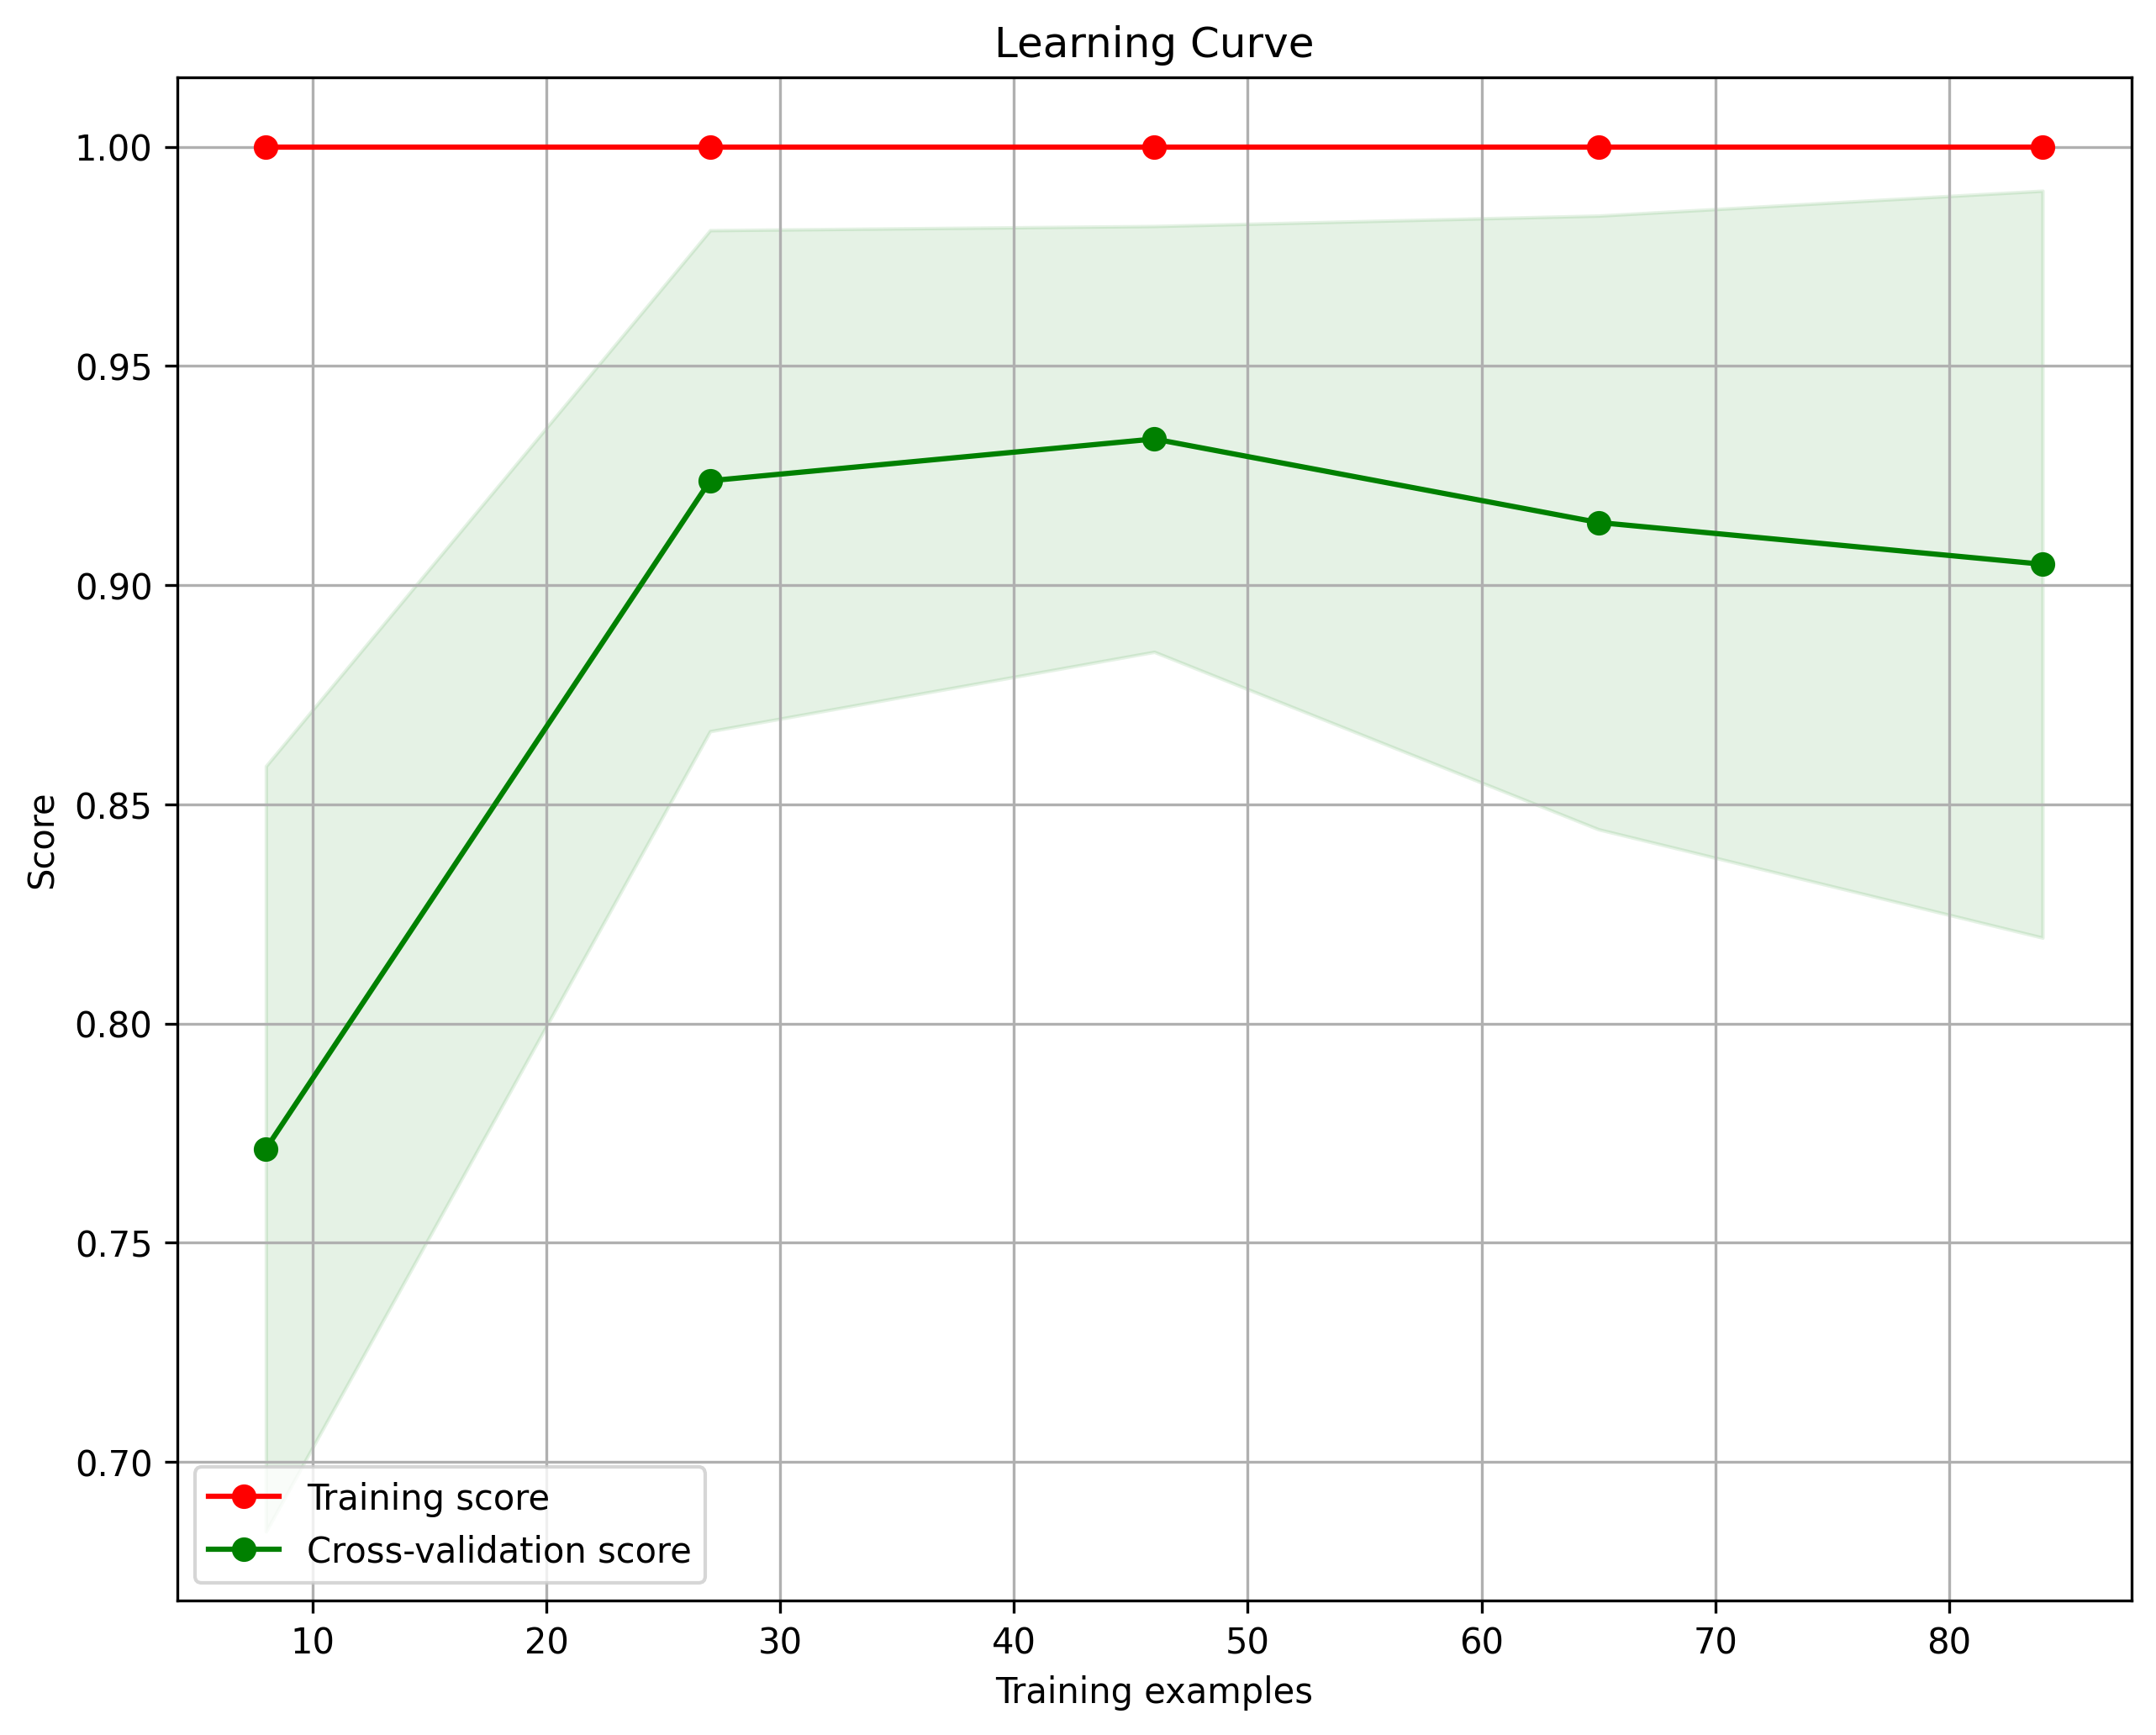

In [ ]:
# courbe d'apprentissage
skplt.estimators.plot_learning_curve(clf_model, X_train_iris, y_train_iris, figsize=(10,8))   

#### Données d'entraînement et de test
**Question 17** : <br>
Quel est l'avantage de diviser le jeu de données en données d'apprentissage et des données de test ? 

**Question 18** :<br>
Diviser le jeu de données en jeu de données d'entraînement (80%) et de test (20%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 42


**Question 19** :<br>
Quelle est la limite de la métode train_test_split sur la précision ? comment pallier à cette limite ? <br>
**Tips :** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-Folds cross-validation</a>, <a href="https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search">Grid Search</a> <br>

**Ressources**
* <a href="https://scikit-learn.org/stable/modules/cross_validation.html?highlight=cross_validation">Cross-validation scikit learn</a>
* <a href="https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85">Cross Validation Explained: Evaluating estimator performance.</a>
* <a href="http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_knn_cross_val.html">Validation croisée</a>


#### Modèle | DecisionTreeClassifier
**Question 20** : <br>
Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeClassifier">*DecisionTreeClassifier*</a> du package *sklearn.tree* pour créer l'objet *classifier*<br>
Utiliser les paramètres par défaut.

**Question 21** :<br> Quels sont les paramètres de la classe *DecisionTreeClassifier* qui influencent la performance de l'algorithme ?  <br>
**Ressources** <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a> <br>
<a href="https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3">InDepth : Parameter tuning for Decision Tree (classification)</a>

Les paramètres à optimiser pour un arbre de décision optimal sont les suivants : 
* 
*
*



**Question 22** :  <br>
Créer les deux sous-ensemble de données d'apprentissage et de test en utilisant la technique de validation croisée. <br>
Stocker le résultat dans la variable *cv_sets*. <br>
Utiliser les paramètres suivants :
* $n\_splits$ = $10$
* $shuffle$ = $True$ 
* $random\_state$ = $42$ <br>
Tips : Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold">*KFold*</a> du package *sklearn.model-selection*

**NB** : Dans ce qui suit, on se focalisera sur le premier paramètre, à savoir, **max_depth**. Le même raisonnement peut être appliqué à chacun des paramètres ou à une combinaison de paramètres. 

#### Entraînement de l'arbre de décision 

##### Optimisation du paramètre max_depth
Pour trouver la valeur du paramètre max_depth qui donne le meilleur estimateur (meilleur arbre de décision), on utilise la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV">GridSearchCV</a>. <br>
Pour cela, il faut suivre les étapes suivantes !

**Question 23** : <br>
Créer un dictionnaire pour *max_depth* avec les valeurs de 1 à 10. <br>
Affecter-le à la variable *params*

**Question 24** : <br>
Créer un objet grid search en utilisant la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV">*GridSearchCV*</a> du package *sklearn.model_selection*
* paramètres : classifier, params, score="accuracy", cv_sets
* variable : grid_cv

**Question 25** :<br>
Entraîner le méta estimateur grid_cv pour trouver l'estimateur optimal en utilisant la méthode *fit*. <br>

**Question 26** : <br>
Quel est le meilleur modèle ? <br>
Stocker le meilleur modèle dans la variable *best_tree*<br>
**Tips** : Utiliser l'attribut *best_estimator_*

**Question 27** : <br>
Quelle est la profondeur maximale (*max_depth*) du modèle optimal (best_tree) ? <br>
**Tips** : Utiliser l'attribut *best_params_* de la classe *GridSearchCV*

#### Prédiction

**Question 30** : <br>
Prédire le type d'Iris pour les données de test *X_test*


#### Intérpretation  


**Question 31** : <br>
Intérpreter les résultats (la prédiction semble logique ?)

Fin troisième partie 
---

##### Courbe d'apprentissage

**Question 32** : <br>
Qu'est ce que la courbre d'apprentissage ? <br>
**Ressource** : <a href="https://fr.qaz.wiki/wiki/Learning_curve_(machine_learning)">Courbe d'apprentissage</a>

**Question 33** :<br>
Afficher la **courbe d'apprentissage** du classifier en utilisant la méthode *plot_learning_curve* du module *estimators* de scikit plot

**Question 34** : <br>
Interpréter les graphiques 

### Pour aller plus loin : <a class="anchor" id="post_pruning"></a>
<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py">Post élagage avec scikit learn | Exemple </a>